In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
import seaborn as sns
sns.set()

In [2]:
os.getcwd()

'C:\\Users\\kanur\\Desktop\\Projects\\production management'

In [3]:
dataset= pd.read_csv('manufacturing dataset.csv')
dataset.head(),dataset.shape

(                  Time        0        1          2          3       4      5  \
 0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
 1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
 2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
 3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
 4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
 
           6       7       8  ...       581     582     583     584      585  \
 0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
 1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
 2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
 3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
 4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   
 
       586     587     5

In [ ]:
# As you can see the amount features is big(592). This means watching on features is fully blindful. 

In [ ]:
# Now , the other option left here, simply start your work on preprocessing , EDA, and Feature Selection the model Building

In [ ]:
# One more thing here is that much big number of features may have some ambuigity and non relevant info, 
# so we can also go through by using the Dimension Reduction to improve the model Score and its performance.

<AxesSubplot:ylabel='None'>

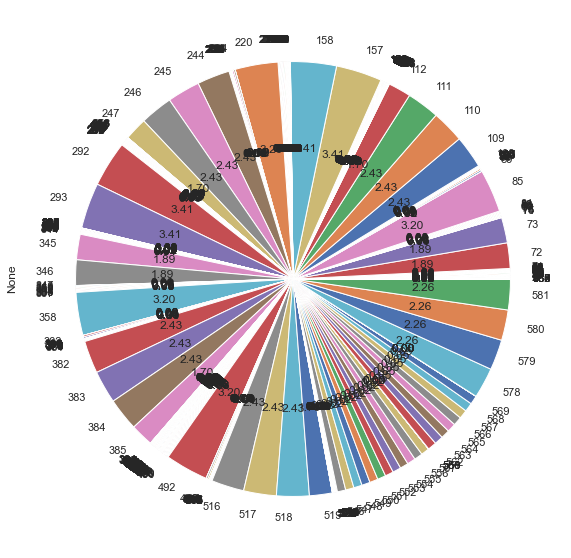

In [4]:
# This much null data inside out dataset.
dataset.isnull().sum().plot.pie(autopct='%.2f')

In [5]:
# filling null values with zero0
df = dataset.iloc[:,1:]
df = df.apply(lambda x:x.fillna(0), axis=0)
# axis=0 - row wise
df2 = dataset.iloc[:,0]
result = pd.concat([df, df2], axis=1).reindex(df.index)
# axis=1

In [6]:
# Naming the Features  as Feature index
result.columns = 'features_'+result.columns

In [7]:
result.rename(columns = {'features_Time': 'Time'}, inplace=True)
result.rename(columns = {'features_Pass/Fail': 'Pass_Fail'}, inplace=True)

In [8]:
# Extracting the Time feature into year, month, Date, Week_day,start_time,hour,min...
from datetime import datetime
result['year'] = pd.DatetimeIndex(result['Time']).year
result['month'] = pd.DatetimeIndex(result['Time']).month
result['date'] = pd.DatetimeIndex(result['Time']).day
result['week_day'] = pd.DatetimeIndex(result['Time']).weekday
result['start_time'] = pd.DatetimeIndex(result['Time']).time
result['hour'] = pd.DatetimeIndex(result['Time']).hour
result['min'] = pd.DatetimeIndex(result['Time']).minute

In [9]:
x= result.drop(['Pass_Fail','Time','year','start_time'], axis=1)
y=result['Pass_Fail']

In [10]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
x_scaler= scaler.fit_transform(x)

In [12]:
x=pd.DataFrame(x_scaler,columns=x.columns[:])

<AxesSubplot:ylabel='Pass_Fail'>

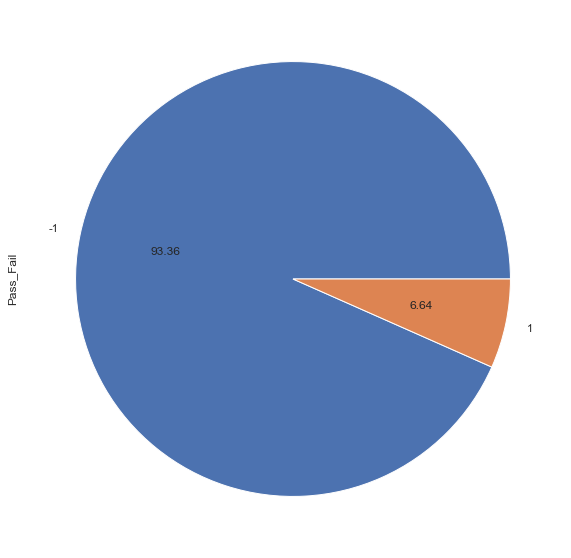

In [13]:
y.value_counts().plot.pie(autopct='%.2f')

In [14]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [15]:
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
x_ros.shape,y_ros.shape

((2926, 595), (2926,))

In [16]:
# from sklearn.preprocessing import MinMaxScaler

In [17]:
# scaler = MinMaxScaler((-1,1))
# x = scaler.fit_transform(x_ros)
# y = y_ros

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score

**************************************************************************************************************
                  Method Used  Accuracy
0         Logistic Regression  0.910714
1               Decision Tree  0.880102
2           RandomForest Gini  0.933673
3        RandomForest Entropy  0.933673
4              Support Vector  0.933673
5         K Nearest Neighbors  0.928571
6                  GuassionNB  0.196429
7                 BernoulliNB  0.821429
8             RidgeClassifier  0.926020
9   GradientDescentClassifier  0.931122
10          BaggingClassifier  0.933673
11          Voting Classifier  0.933673
AxesSubplot(0.125,0.125;0.775x0.755)


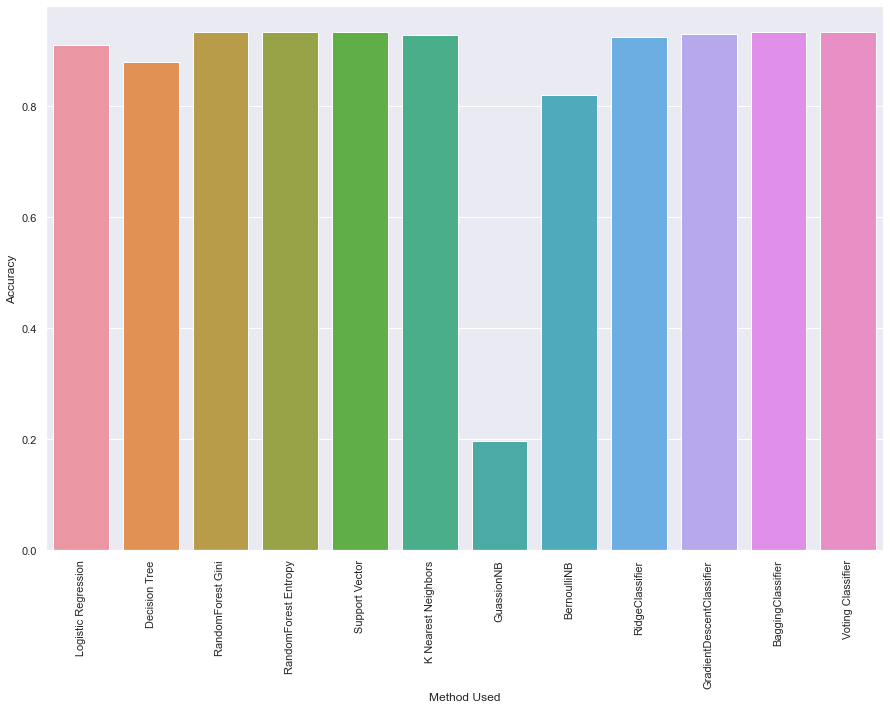

In [20]:
#model Building
list=[]
accuracy=[]


# Model 1- Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
# param_grid= [{'penalty': ['l1','l2','elasticnet','none'],
#               'c':np.logspace(-1,1),
#               'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
#               'max_iter': [100,1000,2500,5000]}]
logr=classifier.fit(x_train,y_train)
pred_lr_test=logr.predict(x_test)
pred_lr_train=logr.predict(x_train)

accuracy_LR=accuracy_score(pred_lr_test,y_test)
accuracy_LR_train=accuracy_score(pred_lr_train,y_train)
f1LR=f1_score(pred_lr_test,y_test)


# Model 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train, y_train)
# prediction
y_pred2_test = dt.predict(x_test)
y_pred2_train = dt.predict(x_train)
# evaluation
accuracy_DT = accuracy_score(y_test, y_pred2_test)
accuracy_DT_train=accuracy_score(y_pred2_train,y_train)
f1DT=f1_score(y_pred2_test,y_test)


# Model 3 
# criteria - gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)
#prediction
y_pred3_test = classifier3.predict(x_test)
y_pred3_train = classifier3.predict(x_train)
# evaluation
accuracy_RFI = accuracy_score(y_test, y_pred3_test)
accuracy_RFI_train=accuracy_score(y_pred3_train,y_train)
f1RFCG=f1_score(y_pred3_test,y_test)


# Model 4
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(x_train, y_train)
# predict
y_pred4_test = rfe.predict(x_test)
y_pred4_train = rfe.predict(x_train)
# evaluation
accuracy_RFE = accuracy_score(y_test, y_pred4_test)
accuracy_RFE_train=accuracy_score(y_pred4_train,y_train)
f1RFCE=f1_score(y_pred4_test,y_test)


# Model 5
from sklearn.svm import SVC

model_svm = SVC()
SVM = model_svm.fit(x_train, y_train)
#prediction
y_pred5_test = SVM.predict(x_test)
y_pred5_train = SVM.predict(x_train)
# evaluation
accuracy_SVC = accuracy_score(y_test, y_pred5_test)
accuracy_SVC_train=accuracy_score(y_pred5_train,y_train)
f1SVM=f1_score(y_pred5_test,y_test)


# Model 6
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(x_train, y_train)
#prediction
pred_knn_test = knn.predict(x_test)
pred_knn_train = knn.predict(x_train)
# evaluation
accuracy_knn = accuracy_score(y_test, pred_knn_test)
accuracy_KNN_train=accuracy_score(pred_knn_train,y_train)
f1KNN=f1_score(pred_knn_test,y_test)


# model 7
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbb = gnb.fit(x_train, y_train)
# prediction
pred_gnb_test = gnbb.predict(x_test)
pred_gnb_train = gnbb.predict(x_train)
# evaluation
accuracy_GNB = accuracy_score(y_test, pred_gnb_test)
accuracy_GNB_train=accuracy_score(pred_gnb_train,y_train)
f1GNB=f1_score(pred_gnb_test,y_test)

# model 8
from sklearn.naive_bayes import BernoulliNB
modelB = BernoulliNB()
bnb = modelB.fit(x_train, y_train)
# prediction
pred_bnb_test = bnb.predict(x_test)
pred_bnb_train = bnb.predict(x_train)
# evaluation
accuracy_BNB = accuracy_score(y_test, pred_bnb_test)
accuracy_BNB_train=accuracy_score(pred_bnb_train,y_train)
f1BNB=f1_score(pred_bnb_test,y_test)

# model 9
from sklearn.linear_model import RidgeClassifier
ridg=RidgeClassifier()
rgmodel=ridg.fit(x_train,y_train)
pred_rg_test=rgmodel.predict(x_test)
pred_rg_train=rgmodel.predict(x_train)

accuracy_rg_test=accuracy_score(y_test,pred_rg_test)
accuracy_rg_train=accuracy_score(y_train,pred_rg_train)

rg_f1=f1_score(y_test,pred_rg_test)

# model 10
from sklearn.ensemble import GradientBoostingClassifier
graboo=GradientBoostingClassifier()
gb=graboo.fit(x_train,y_train)

pred_gb_test=gb.predict(x_test)
pred_gb_train=gb.predict(x_train)

accuracy_gb_test=accuracy_score(y_test,pred_gb_test)
accuracy_gb_train=accuracy_score(y_train,pred_gb_train)

gb_f1=f1_score(y_test,pred_gb_test)

# model 11
from sklearn.ensemble import BaggingClassifier
Bagg=BaggingClassifier()
bag=Bagg.fit(x_train,y_train)

pred_bg_test=bag.predict(x_test)
pred_bg_train=bag.predict(x_train)

accuracy_bg_test=accuracy_score(y_test,pred_bg_test)
accuracy_bg_train=accuracy_score(y_train,pred_bg_train)

bg_f1=f1_score(y_test,pred_bg_test)

# # model 9
# from xgboost import XGBClassifier
# xgb=XGBClassifier()
# model_xgb=xgb.fit(x_train,y_train)

# y_pred_xgb_test=model_xgb.predict(x_test)
# y_pred_xgb_train=model_xgb.predict(x_train)

# accuracyxgb=accuracy_score(y_test,y_pred_xgb_test)
# accuracy_XGB_train=accuracy_score(y_pred_xgb_train,y_train)
# f1XGB=f1_score(y_pred_xgb_test,y_test)

# combining all the above model by using voting classifier model

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr', logr), ('DT', dt), ('RFI', rfi),('RFE', rfe),
                                     ('SVC', SVM), ('KNN', knn),('GNB', gnbb),
                                    ('BNB', bnb),('Riddg',rgmodel),('GRaboo',gb),('BGG',bag)], voting = 'hard',
                                    flatten_transform=True)
model_evc = evc.fit(x_train, y_train)
# prediction
pred_evc_test = model_evc.predict(x_test)
pred_evc_train = model_evc.predict(x_train)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc_test)
accuracy_voting_train=accuracy_score(pred_evc_train,y_train)
f1VOTING=f1_score(pred_evc_test,y_test)

list1 = ["Logistic Regression",'Decision Tree','RandomForest Gini', 'RandomForest Entropy',
        'Support Vector','K Nearest Neighbors','GuassionNB','BernoulliNB','RidgeClassifier','GradientDescentClassifier',
         'BaggingClassifier','Voting Classifier']

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_SVC,accuracy_knn,
        accuracy_GNB,accuracy_BNB, accuracy_rg_test, accuracy_gb_test, accuracy_bg_test, accuracy_evc]

# list3 = [logr,classifier2,classifier3,classifier4,model_svm,model_knn,
#         gnb,modelB,model_evc]

list4 = [f1LR,f1DT,f1RFCG,f1RFCE,f1SVM,f1KNN,f1GNB,f1BNB,rg_f1,gb_f1,bg_f1,f1VOTING]

list5 = [accuracy_LR_train,accuracy_DT_train,accuracy_RFI_train,accuracy_RFE_train,accuracy_SVC_train,accuracy_KNN_train,accuracy_GNB_train,
        accuracy_BNB_train,accuracy_rg_train,accuracy_gb_train,accuracy_bg_train,accuracy_voting_train]
# for test data accuracy
df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print('***********'*10)
print(df_accuracy)

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)


**************************************************************************************************************
                  Method Used  Training Data Accuracy
0         Logistic Regression                0.988085
1               Decision Tree                1.000000
2           RandomForest Gini                1.000000
3        RandomForest Entropy                0.999149
4              Support Vector                0.940426
5         K Nearest Neighbors                0.934468
6                  GuassionNB                0.234043
7                 BernoulliNB                0.824681
8             RidgeClassifier                0.956596
9   GradientDescentClassifier                0.989787
10          BaggingClassifier                0.985532
11          Voting Classifier                0.994043
AxesSubplot(0.125,0.125;0.775x0.755)


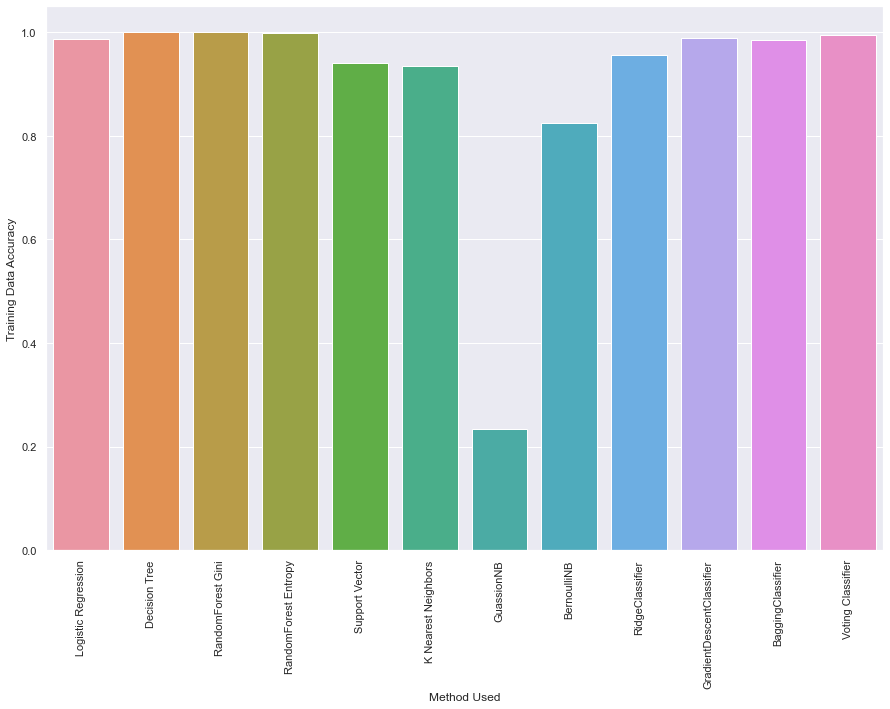

In [21]:
# for train data accuracy
df_traindata_accuracy= pd.DataFrame({'Method Used' :list1, "Training Data Accuracy" :list5})
print('***********'*10)
print(df_traindata_accuracy)

charts1 = sns.barplot(x='Method Used', y = 'Training Data Accuracy', data=df_traindata_accuracy)
charts1.set_xticklabels(charts1.get_xticklabels(), rotation=90)
print(charts1)


**************************************************************************************************************
                  Method Used  F1_score_accuracy
0         Logistic Regression           0.255319
1               Decision Tree           0.229508
2           RandomForest Gini           0.000000
3        RandomForest Entropy           0.000000
4              Support Vector           0.000000
5         K Nearest Neighbors           0.000000
6                  GuassionNB           0.117647
7                 BernoulliNB           0.239130
8             RidgeClassifier           0.121212
9   GradientDescentClassifier           0.181818
10          BaggingClassifier           0.071429
11          Voting Classifier           0.000000
AxesSubplot(0.125,0.125;0.775x0.755)


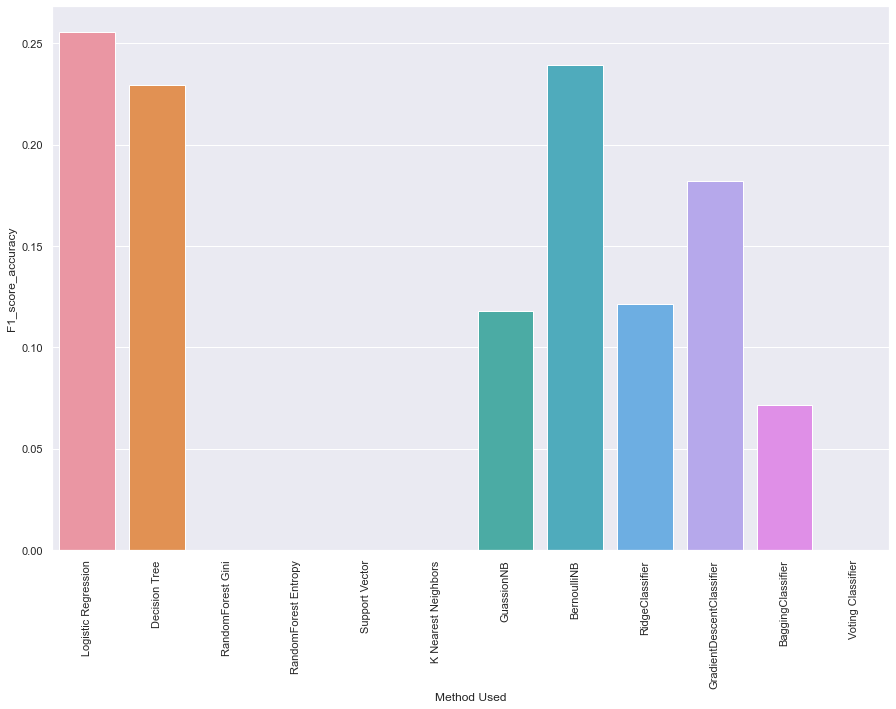

In [22]:
#F1_score for test data
df_F1score = pd.DataFrame({'Method Used' :list1, "F1_score_accuracy" :list4})
print('***********'*10)
print(df_F1score)

charts2 = sns.barplot(x='Method Used', y = 'F1_score_accuracy', data=df_F1score)
charts2.set_xticklabels(charts2.get_xticklabels(), rotation=90)
print(charts2)

In [23]:
# now for Roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

In [24]:
# Logistic Regression
def plot_roc(logr, x_test, y_test):
    probabilities = logr.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

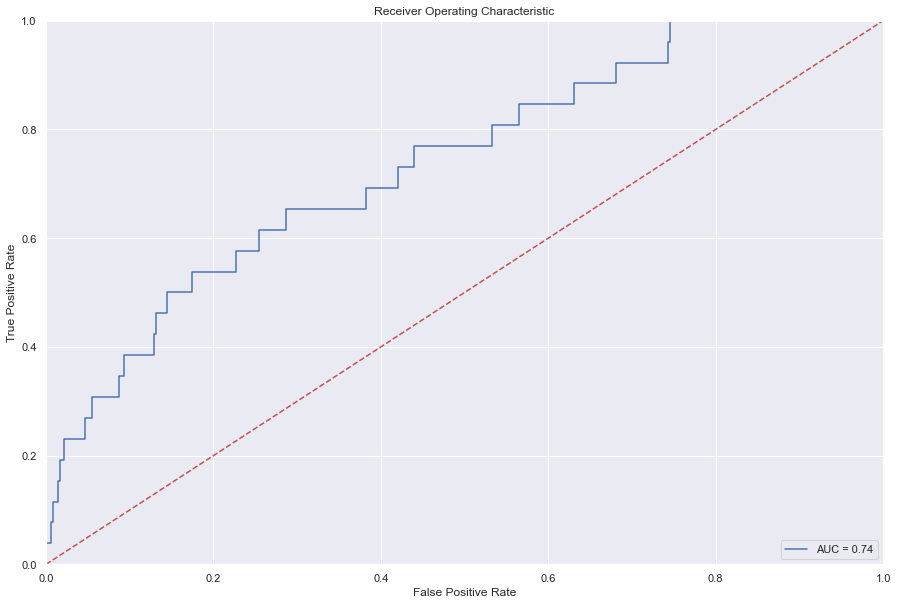

In [25]:
plot_roc(logr, x_test, y_test)

In [26]:
# Decision Tree
def plot_roc(dt, x_test, y_test):
    probabilities = dt.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

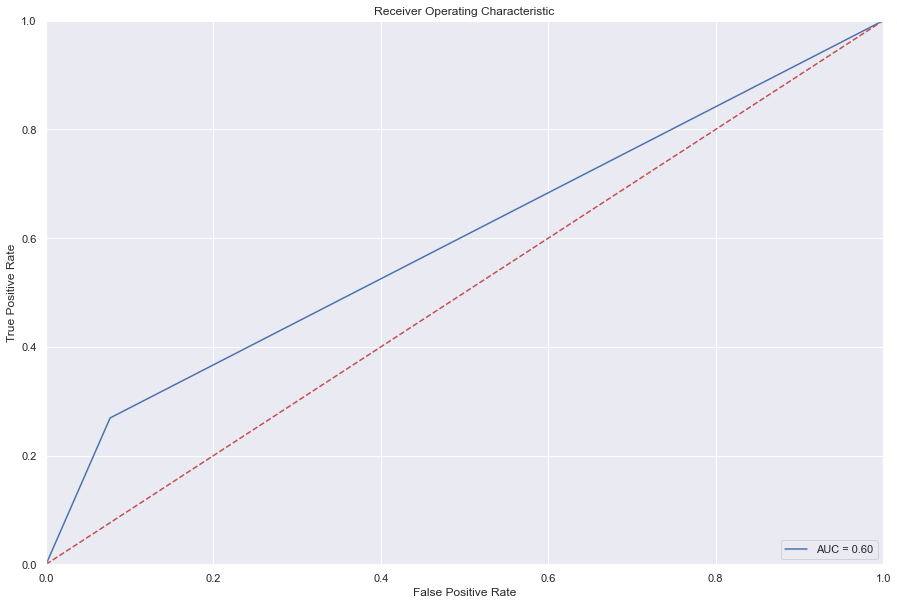

In [27]:
plot_roc(dt, x_test, y_test)

In [28]:
# Random Forest Classifier - gini
def plot_roc(rfi, x_test, y_test):
    probabilities = rfi.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

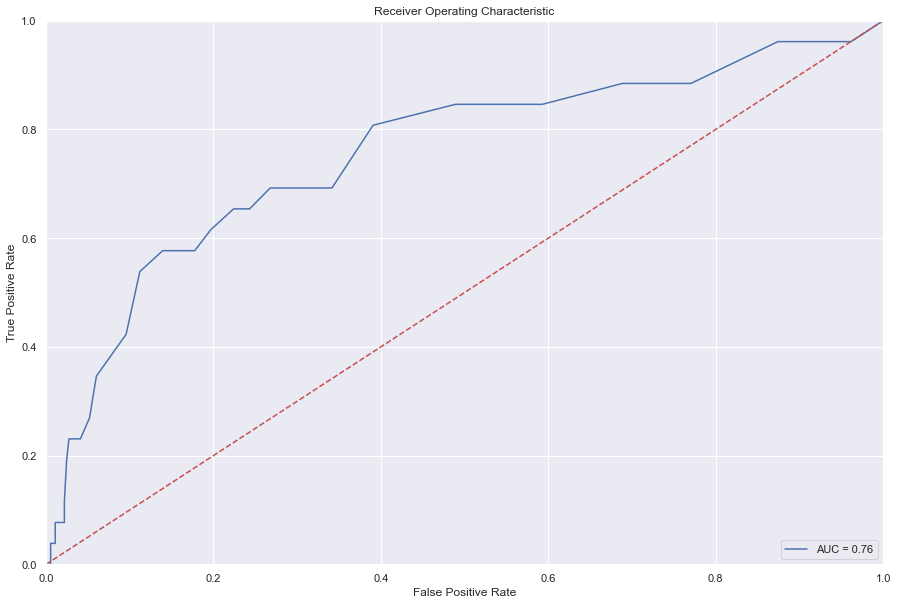

In [29]:
plot_roc(rfi, x_test, y_test)

In [30]:
# Random Forest Classifier - Entropy
def plot_roc(rfe, x_test, y_test):
    probabilities = rfe.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

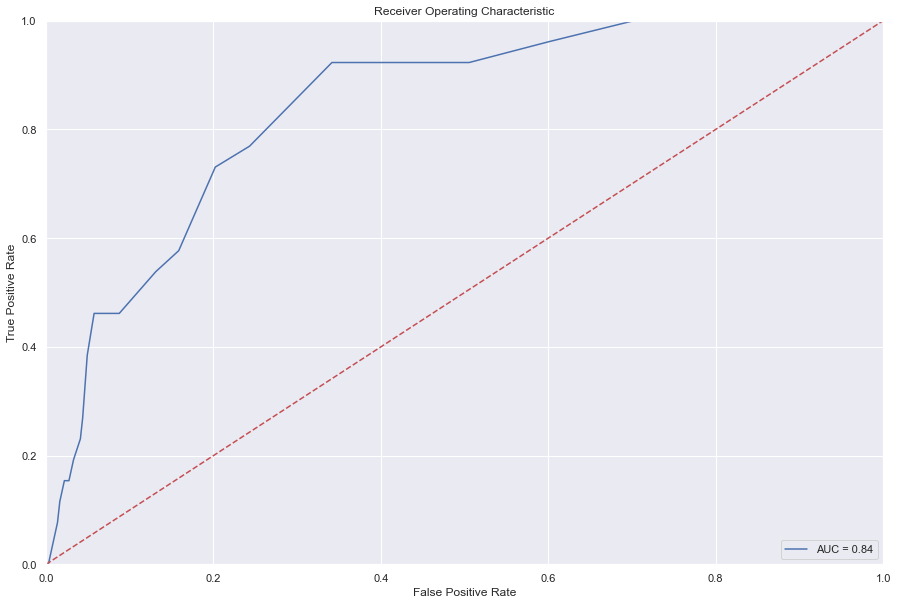

In [31]:
plot_roc(rfe, x_test, y_test)

In [32]:
# # Support Vector Machine
# def plot_roc(SVM, x_test, y_test):
#     probabilities = SVM.predict_proba(np.array(x_test))
#     predictions = probabilities
#     fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
#     roc_auc = auc(fpr, tpr)
    
#     plt.title("Receiver Operating Characteristic")
#     plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
#     plt.legend(loc='lower right')
#     plt.plot([0,1], [0,1], 'r--')
#     plt.xlim([0,1])
#     plt.ylim([0,1])
#     plt.ylabel("True Positive Rate")
#     plt.xlabel('False Positive Rate')
#     plt.show()

In [33]:
# plot_roc(SVM, x_test, y_test)

In [34]:
# Kneighbors Classifier
def plot_roc(knn, x_test, y_test):
    probabilities = knn.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

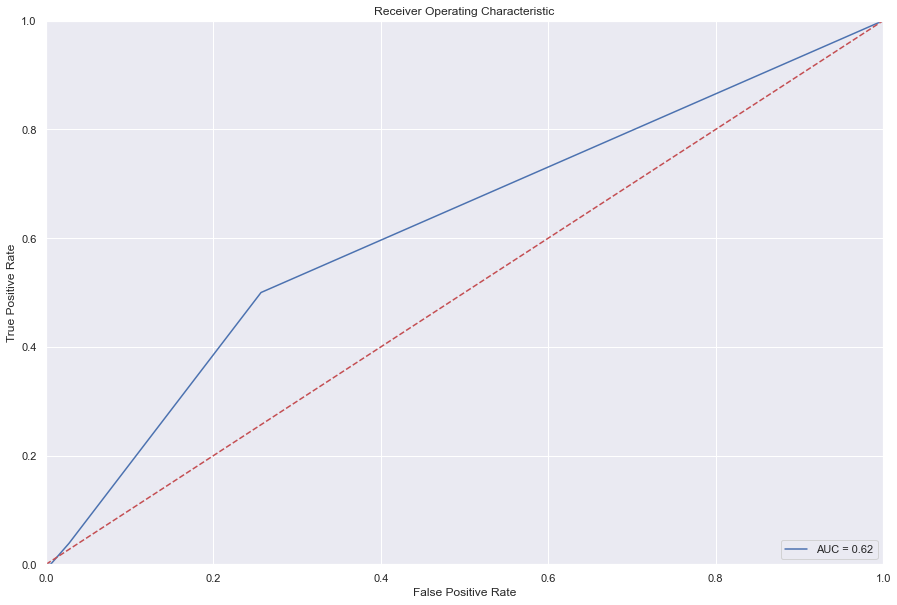

In [35]:
plot_roc(knn, x_test, y_test)

In [36]:
# Gaussian NB Classifier
def plot_roc(gnbb, x_test, y_test):
    probabilities = gnbb.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

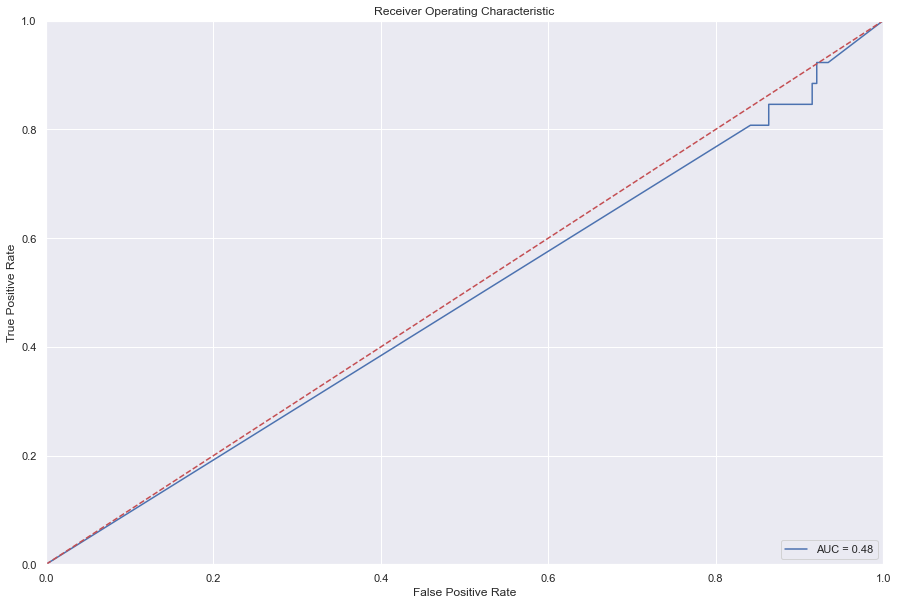

In [37]:
plot_roc(gnbb, x_test, y_test)

In [38]:
# Bernoulli NB Classifier
def plot_roc(bnb, x_test, y_test):
    probabilities = bnb.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

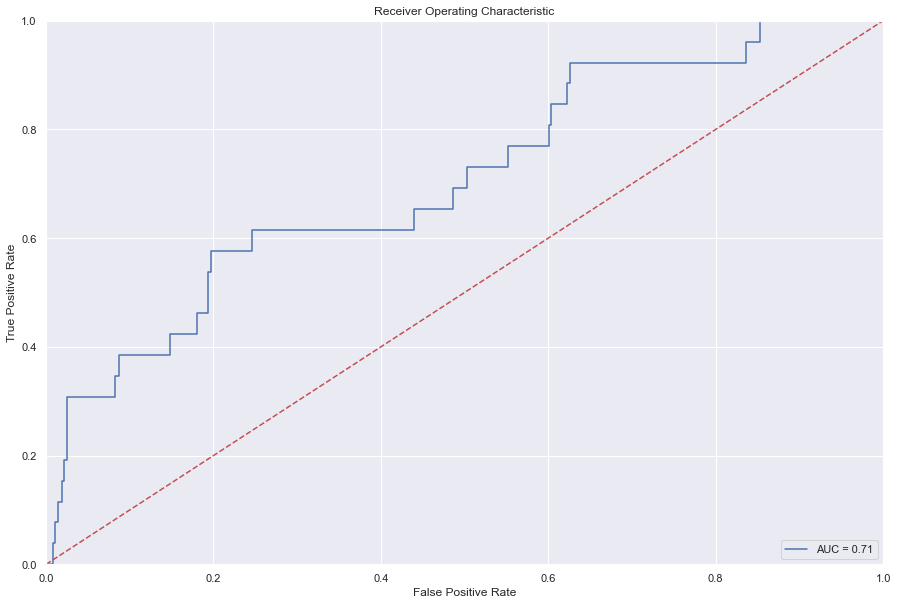

In [39]:
plot_roc(bnb, x_test, y_test)

In [40]:
# # Bernoulli NB Classifier
# def plot_roc(rgmodel, x_test, y_test):
#     probabilities = rgmodel.predict_proba(np.array(x_test))
#     predictions = probabilities
#     fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
#     roc_auc = auc(fpr, tpr)
    
#     plt.title("Receiver Operating Characteristic")
#     plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
#     plt.legend(loc='lower right')
#     plt.plot([0,1], [0,1], 'r--')
#     plt.xlim([0,1])
#     plt.ylim([0,1])
#     plt.ylabel("True Positive Rate")
#     plt.xlabel('False Positive Rate')
#     plt.show()

In [41]:
# plot_roc(rgmodel, x_test, y_test)

In [42]:
# Bernoulli NB Classifier
def plot_roc(gb, x_test, y_test):
    probabilities = gb.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

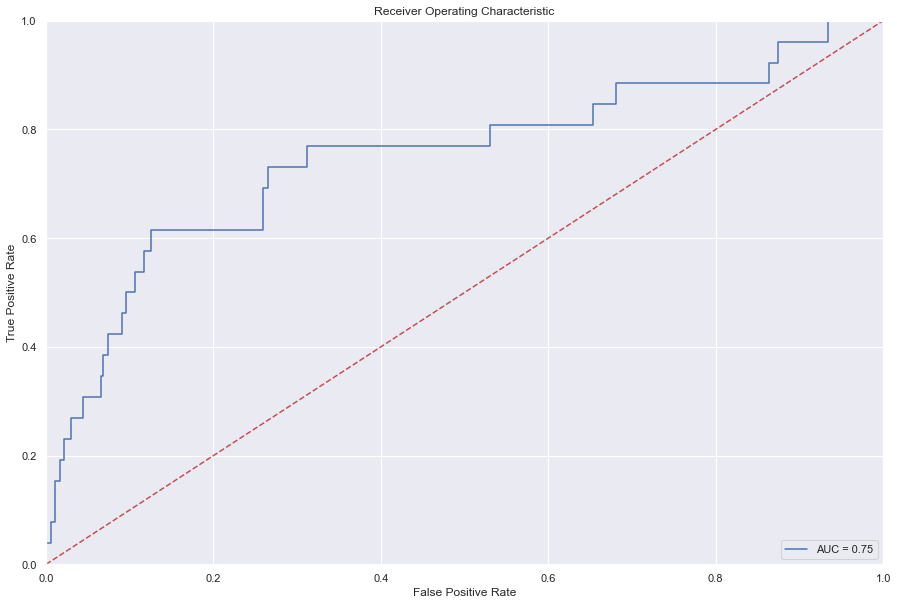

In [43]:
plot_roc(gb, x_test, y_test)

In [44]:
# Bernoulli NB Classifier
def plot_roc(bag, x_test, y_test):
    probabilities = bag.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

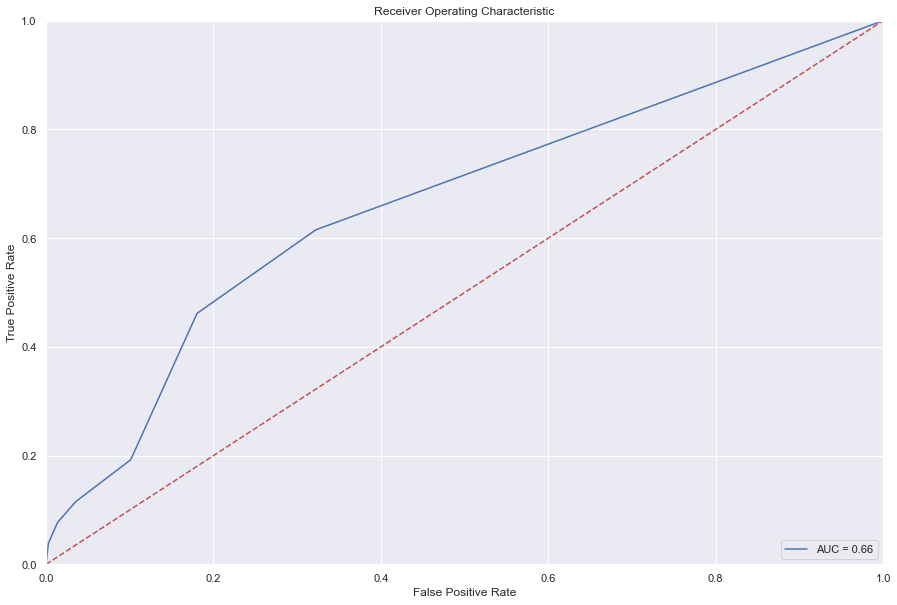

In [45]:
plot_roc(bag, x_test, y_test)

# Now Run These trained data with Hyperparameter tuning models

In [46]:
# #*******************logistic regression********************************
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV

# # define parameters
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2','l1']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train, y_train)
# # summarize results
# lr_bestscore=grid_result.best_score_
# print(lr_bestscore)
# lr_Bestparam=grid_result.best_params_
# print(lr_Bestparam)

In [48]:
#************************************************ Decision Tree ***********************************
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':[2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100],'criterion':['gini','entropy']}

grid_search=GridSearchCV(estimator=classifier2, param_grid=params,cv=4,n_jobs= -1,verbose=1,scoring="accuracy")
grid_search.fit(x_train,y_train)

dstr_best=grid_search.best_score_
print(dstr_best)
dstr_bestparam=grid_search.best_estimator_
print(dstr_bestparam)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
0.9336183278772261
DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=14)


In [49]:
#****************Random Forest *******************************
# define models and parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=classifier3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
rndmfrsst_best=grid_result.best_score_
print(rndmfrsst_best)
rndmfrst_bestparam=grid_result.best_params_
print(rndmfrst_bestparam)

0.9336230624366217
{'max_features': 'log2', 'n_estimators': 10}


In [50]:
#****************************svc*****************************
# define parameters
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
svc_best=grid_result.best_score_
print(svc_best)
svc_bestparam=grid_result.best_params_
print(svc_bestparam)

0.9336230624366217
{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [51]:
#*********************************knn*************************************************
# define models and parameters
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
knn_best=grid_result.best_score_
print(knn_best)
knn_bestParams=grid_result.best_params_
print(knn_bestParams)

0.9336230624366217
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [52]:
# ******************************** Ridge Classifier ***********************************
# define parameters
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
ridg_best=grid_result.best_score_
print(ridg_best)
ridg_bestparam=grid_result.best_params_
print(ridg_bestparam)

0.9219831957120093
{'alpha': 0.9}


In [53]:
# ********************************** Bagging Classifier *********************************
# define parameters
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Bagg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
bag_best=grid_result.best_score_
print(bag_best)
bag_bestParam= grid_result.best_params_
print(bag_bestParam)

0.9253947559032304
{'n_estimators': 1000}


In [ ]:
#************************ Gradient Boosting Classifier *********************************************
# define parameters
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=graboo, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)

# summarize results
graboo_best= grid_result.best_score_
print(graboo_best)
graboo_bestparam= grid_result.best_params_
print(graboo_bestparam)

In [ ]:
# **************************** Gaussian NB *************************************************
# define grid search
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnb, param_grid=params_NB, cv=cv_method,verbose=1, scoring='accuracy')
gs_NB.fit(x_train,y_train);

gs_NB_best=gs_NB.best_score_
print(gs_NB_best)
gs_NB_bestparam=gs_NB.best_params_
print(gs_NB_bestparam)

In [ ]:
hpcls=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Support Vector Machine','KNeighbors Classifier','Ridge Classifier','Bagging Classifier','Gradient Boosting Classifier','Gaussian Naive Bayes']
bstscr=[lr_bestscore,dstr_best,rndmfrsst_best,svc_best,knn_best,ridg_best,bag_best,graboo_best,gs_NB_best]

df_HpClsBestscore = pd.DataFrame({'Classifiers' :hpcls, "Best Score" :bstscr})
print('***********'*10)
print(df_HpClsBestscore)

chartt = sns.barplot(x='Classifiers', y = 'Best Score', data=df_HpClsBestscore)
chartt.set_xticklabels(chartt.get_xticklabels(), rotation=90)
print(chartt)